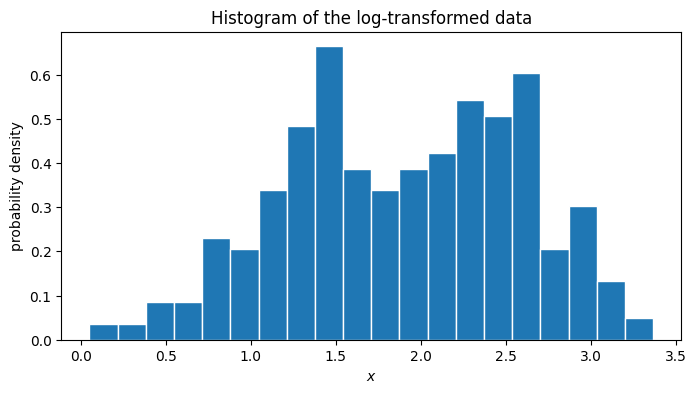

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import pandas
import numpy as np
import scipy.stats as sts
import seaborn as sns

# Load data
data = np.loadtxt('data.csv')

# Log-transform the data
data = np.log(data)

# Plot the data
plt.figure(figsize=(8, 4))
plt.title('Histogram of the log-transformed data')
plt.xlabel('$x$')
plt.ylabel('probability density')
plt.hist(data, bins=20, density=True, edgecolor='white')
plt.show()

# Model 1 (not problematic)

$$
x_i\sim\text{Normal}(m, s) \quad\text{i.i.d. for all i} \\
m \sim \text{Normal(10, 2)} \\
s \sim \text{Uniform(0, 5)}
$$

In [ ]:
with pm.Model() as model1:
  m = pm.Normal('m', mu=5, sigma=2)
  s = pm.Uniform('s', lower=0, upper=5)
  x = pm.Normal('x', mu=m, sigma=s, observed=data)

  inference_1 = pm.sample(chains=4)


Output()

In [ ]:
az.summary(inference_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
m,1.893,0.030,1.835,1.948,0.0,0.0,3928.0,3060.0,1.0
s,0.693,0.022,0.650,0.733,0.0,0.0,4185.0,2885.0,1.0


array([<Axes: title={'center': 'm'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <Axes: title={'center': 's'}, xlabel='Rank (all chains)', ylabel='Chain'>],
      dtype=object)

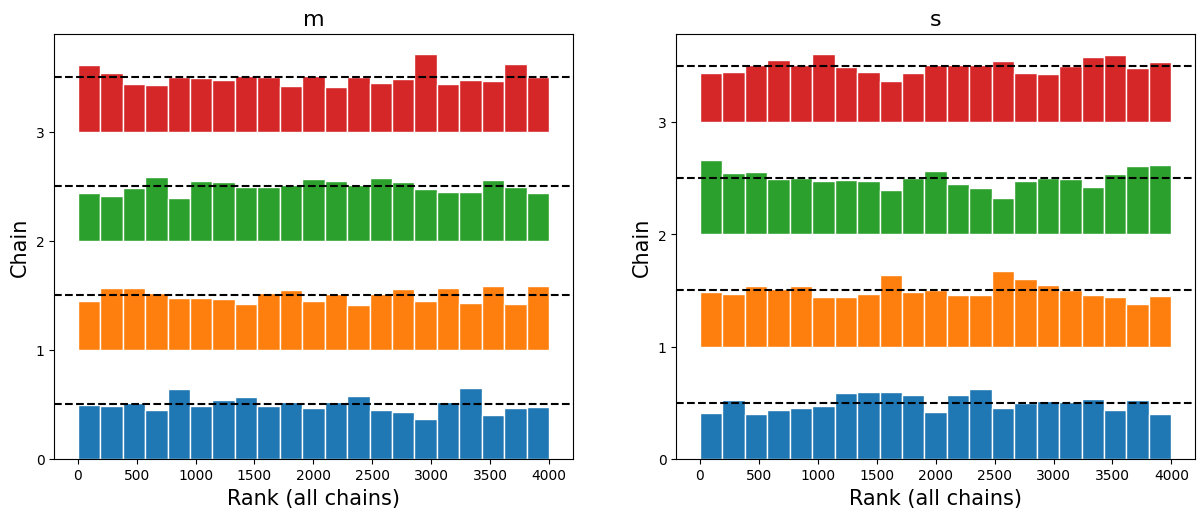

In [ ]:
az.plot_rank(inference_1)

array([[<Axes: >, None],
       [<Axes: xlabel='m', ylabel='s'>, <Axes: >]], dtype=object)

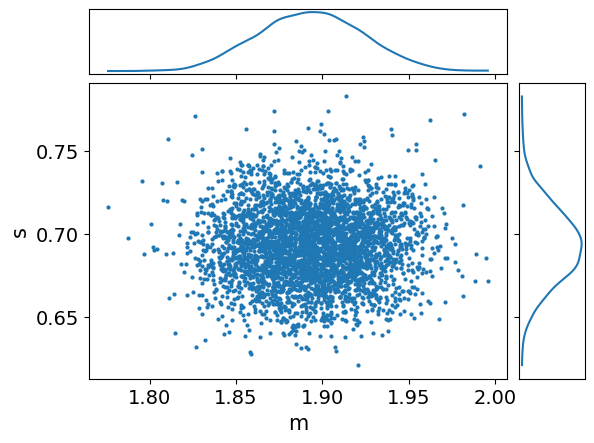

In [ ]:
az.plot_pair(inference_1, marginals=True)

array([[<Axes: title={'center': 'm'}>, <Axes: title={'center': 'm'}>],
       [<Axes: title={'center': 's'}>, <Axes: title={'center': 's'}>]],
      dtype=object)

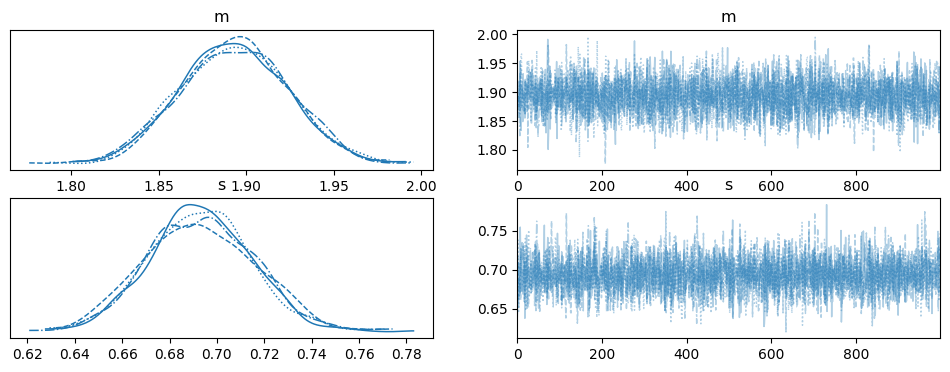

In [ ]:
az.plot_trace(inference_1)

# Model 2 (problematic)


$$x_i \sim \text{Normal-Mixture}([\omega, 1-\omega], [m_1, m_2], [s_1^2, s_2^2])\quad\text{i.i.d. for } i=1,2,\ldots,500 $$ \\
$$m_j\sim\text{Normal}(2.3, 0.5^2) \quad\text{for } j=1,2$$
$$s_j^2\sim\text{Inverse-Gamma}(1, 1) \quad\text{for } j=1,2$$
$$w\sim\text{Beta}(1,1)$$

In [ ]:
with pm.Model() as mixture_model:

    w = pm.Beta('w', alpha=1, beta=1)
    m = pm.Normal('m', shape=2, mu=2.3, sigma=0.5)
    s_squared = pm.InverseGamma('s_squared', shape=2, alpha=1, beta=1)
    x = pm.NormalMixture(
        'x',
        w=[w, 1-w],
        mu=m,
        sigma=np.sqrt(s_squared),
        observed=data)

    inference_2 = pm.sample(chains=4)

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
az.summary(inference_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
m[0],1.975,0.532,1.331,2.583,0.263,0.002,6.0,133.0,1.73
m[1],1.977,0.534,1.340,2.593,0.264,0.002,6.0,171.0,1.73
s_squared[0],0.202,0.074,0.095,0.328,0.032,0.001,6.0,140.0,1.71
s_squared[1],0.202,0.075,0.093,0.327,0.032,0.001,6.0,154.0,1.72
w,0.500,0.101,0.320,0.682,0.040,0.002,7.0,203.0,1.60


array([[<Axes: title={'center': 'm\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'm\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 's_squared\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 's_squared\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'w'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: >]], dtype=object)

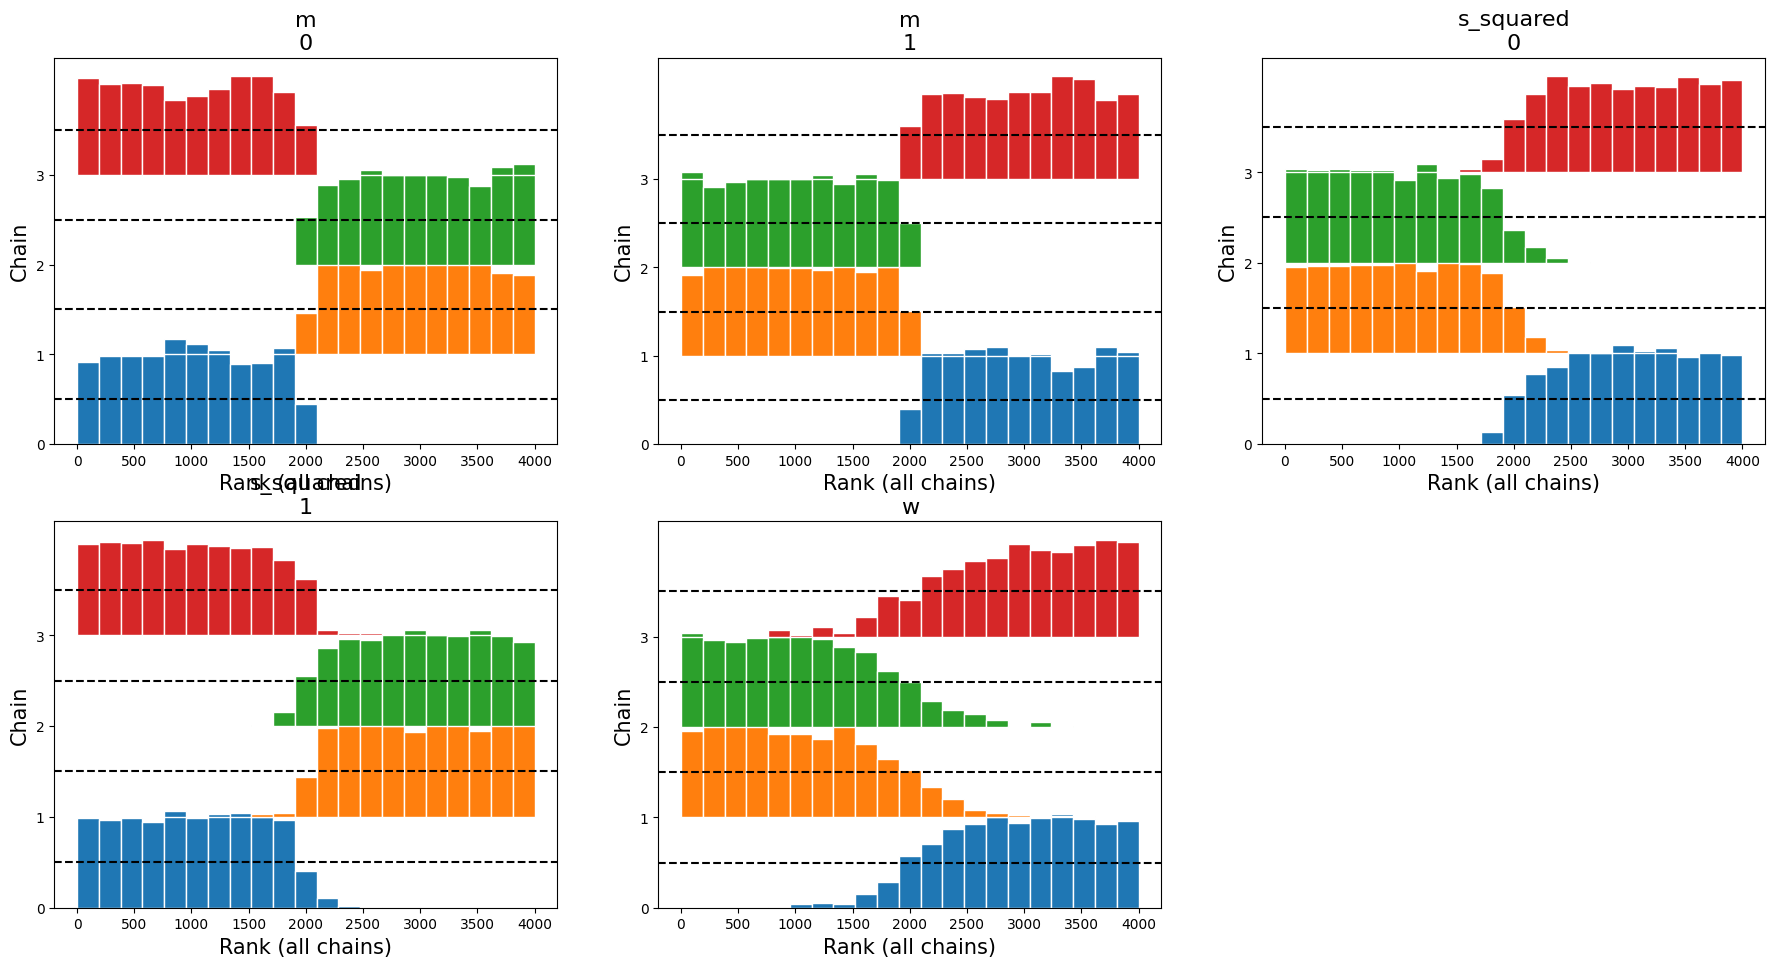

In [ ]:
az.plot_rank(inference_2)

array([<Axes: title={'center': 'm\n0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <Axes: title={'center': 'm\n1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
      dtype=object)

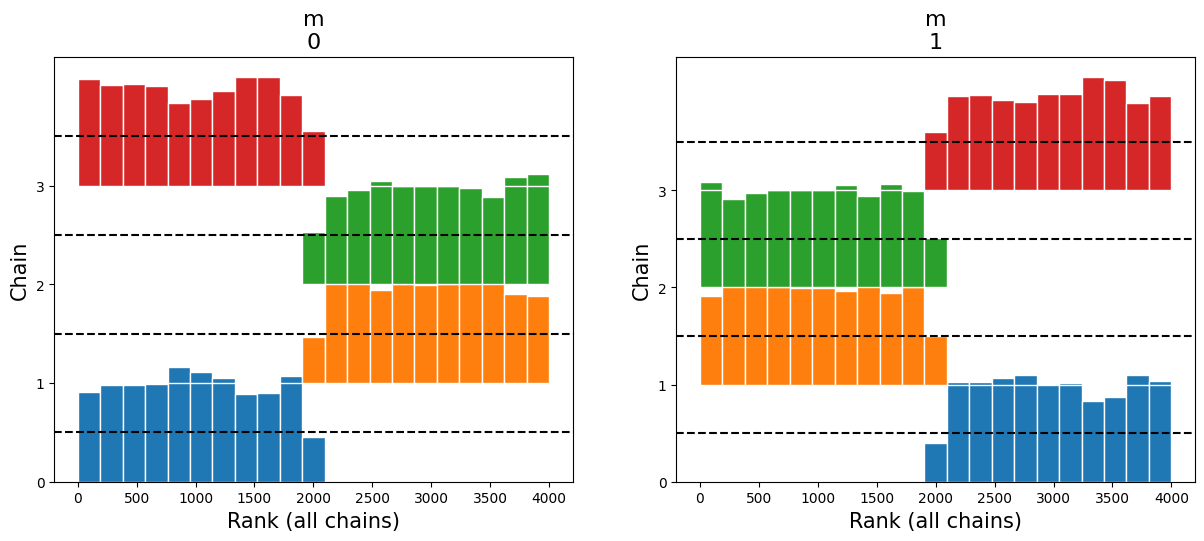

In [ ]:
az.plot_rank(inference_2, var_names = ['m'])

array([[<Axes: ylabel='m\n0'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='m\n1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='s_squared\n0'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='s_squared\n1'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: xlabel='m\n0', ylabel='w'>, <Axes: xlabel='m\n1'>,
        <Axes: xlabel='s_squared\n0'>, <Axes: xlabel='s_squared\n1'>,
        <Axes: xlabel='w'>]], dtype=object)

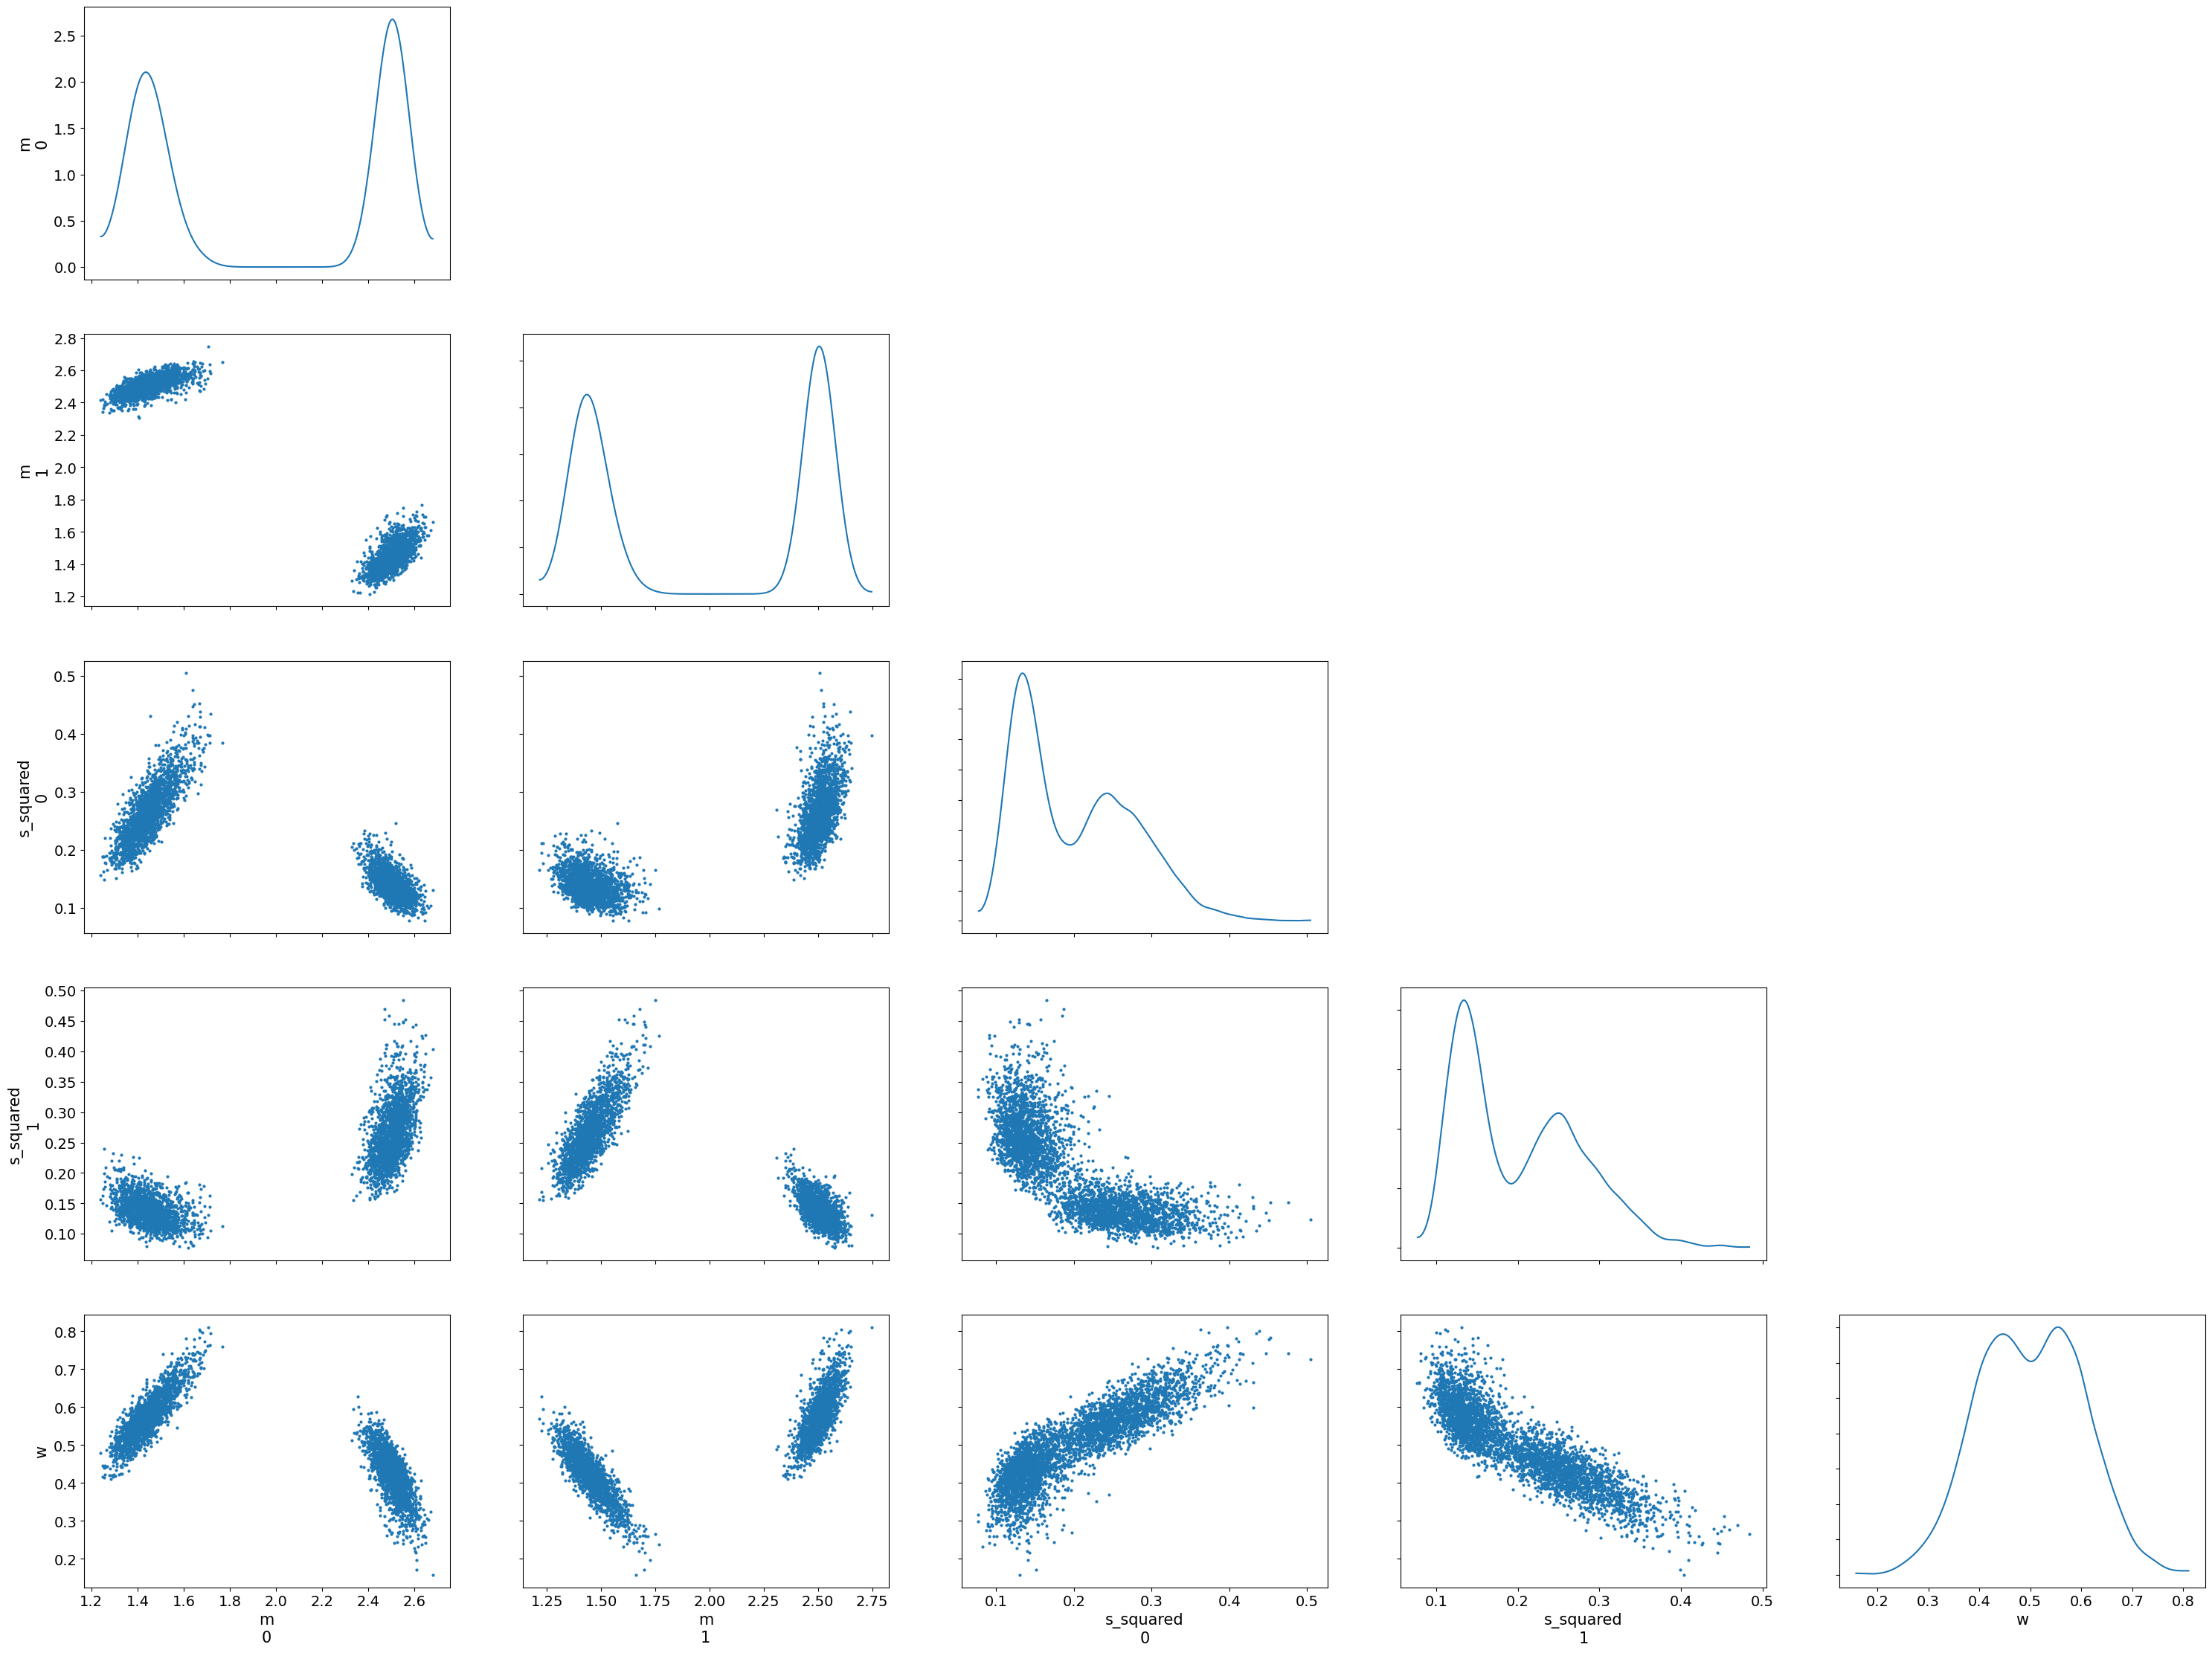

In [ ]:
az.plot_pair(inference_2, marginals=True)

array([[<Axes: >, None],
       [<Axes: xlabel='m\n0', ylabel='m\n1'>, <Axes: >]], dtype=object)

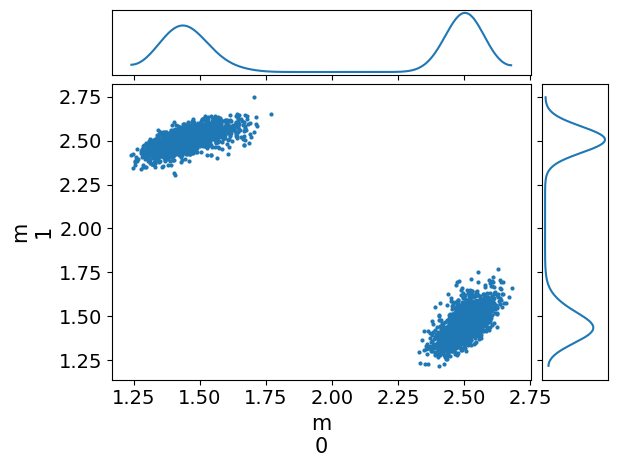

In [ ]:
az.plot_pair(inference_2, marginals=True, var_names=['m'])

array([[<Axes: title={'center': 'm'}>, <Axes: title={'center': 'm'}>],
       [<Axes: title={'center': 's_squared'}>,
        <Axes: title={'center': 's_squared'}>],
       [<Axes: title={'center': 'w'}>, <Axes: title={'center': 'w'}>]],
      dtype=object)

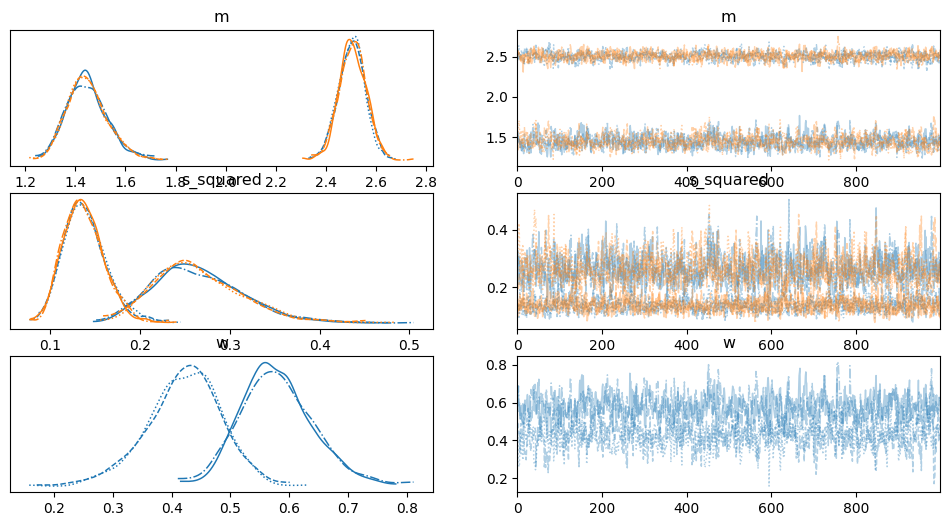

In [ ]:
az.plot_trace(inference_2)

# Plots in the 'Fixing Strategies' section

In [ ]:
def plot_complex_distributions(n_points=10000, figsize=(20, 5)):
  fig, axes = plt.subplots(1, 5, figsize=figsize)
  x = np.linspace(-10, 10, 1000)

  # mixture of gaussians
  def mixture_of_gaussians(x):
      return 0.4 * stats.norm.pdf(x, -3, 0.8) + 0.6 * stats.norm.pdf(x, 2, 1.5)

  # claw distribution (mixture of Gaussians with 5 modes)
  def claw_distribution(x):
      base = stats.norm.pdf(x, 0, 1)
      claws = sum(0.15 * stats.norm.pdf(x, i, 0.2) for i in range(-4, 5, 2))
      return 0.5 * base + 0.5 * claws

  # bimodal with asymmetric tails
  def asymmetric_bimodal(x):
      left = stats.skewnorm.pdf(x, 5, loc=-3, scale=1.5)
      right = stats.skewnorm.pdf(x, -3, loc=3, scale=1)
      return 0.6 * left + 0.4 * right

  # trimodal distribution with varying widths
  def trimodal_distribution(x):
      return (0.3 * stats.norm.pdf(x, -4, 0.7) +
              0.5 * stats.norm.pdf(x, 0, 1.2) +
              0.2 * stats.norm.pdf(x, 5, 0.5))

  # gaussian mixture with heavy tails
  def heavy_tailed_mixture(x):
      center = stats.norm.pdf(x, 0, 1)
      tails = stats.t.pdf(x, df=2, loc=0, scale=2.5)
      bimodal = 0.3 * stats.norm.pdf(x, -4, 0.8) + 0.3 * stats.norm.pdf(x, 4, 0.8)
      return 0.4 * center + 0.3 * tails + 0.3 * bimodal

  distributions = [
      (mixture_of_gaussians, "Mixture of Gaussians"),
      (claw_distribution, "Claw Distribution"),
      (asymmetric_bimodal, "Asymmetric Bimodal"),
      (trimodal_distribution, "Trimodal Distribution"),
      (heavy_tailed_mixture, "Heavy-Tailed Mixture")
  ]

  for i, (dist_func, title) in enumerate(distributions):
      y = dist_func(x)

      y = y / np.max(y)

      axes[i].plot(x, y, 'b-', linewidth=2)
      axes[i].fill_between(x, y, alpha=0.3)
      axes[i].set_title(title)
      axes[i].set_xlim(-8, 8)
      axes[i].set_ylim(0, 1.1)
      axes[i].set_yticks([])

      axes[i].spines['left'].set_visible(False)
      axes[i].spines['right'].set_visible(False)
      axes[i].spines['top'].set_visible(False)

  plt.tight_layout()
  return fig

fig = plot_complex_distributions()
plt.show()

In [ ]:
def plot_unusual_distributions(n_points=5000, figsize=(15, 10)):
  fig, axes = plt.subplots(2, 3, figsize=figsize)
  axes = axes.flatten()

  # ring/annular
  def sample_ring():
      r = 3 + np.random.normal(0, 0.5, n_points)  # radius with noise
      theta = np.random.uniform(0, 2*np.pi, n_points)  # angle
      x = r * np.cos(theta)
      y = r * np.sin(theta)
      return x, y

  # banana-shaped
  def sample_banana():
      x = np.random.normal(0, 1, n_points)
      y = 0.5 * (x**2) + np.random.normal(0, 0.8, n_points)
      return x, y

  # spiral
  def sample_spiral():
      t = np.random.uniform(0, 4*np.pi, n_points)
      r = 0.5 * t
      x = r * np.cos(t) + np.random.normal(0, 0.2, n_points)
      y = r * np.sin(t) + np.random.normal(0, 0.2, n_points)
      return x, y

  # crescent
  def sample_crescent():
      r1 = 5 + np.random.normal(0, 0.5, n_points)
      r2 = 3 + np.random.normal(0, 0.2, n_points)
      theta = np.random.uniform(0, np.pi, n_points)

      x1 = r1 * np.cos(theta)
      y1 = r1 * np.sin(theta)

      x2 = r2 * np.cos(theta)
      y2 = r2 * np.sin(theta)

      # Randomly select points from outer or inner circle to create crescent
      mask = np.random.uniform(0, 1, n_points) > 0.3
      x = np.where(mask, x1, x2)
      y = np.where(mask, y1, y2)
      return x, y

  # x-shaped
  def sample_x_shape():
      t = np.random.uniform(-3, 3, n_points)
      flip = np.random.uniform(0, 1, n_points) > 0.5

      x = t.copy()
      y = np.where(flip, t, -t) + np.random.normal(0, 0.3, n_points)
      return x, y

  # twisted
  def sample_pretzel():
      t = np.random.uniform(0, 2*np.pi, n_points)
      r = 5 + np.cos(3*t) + np.random.normal(0, 0.3, n_points)
      x = r * np.cos(t)
      y = r * np.sin(t)
      return x, y

  distributions = [
      (sample_ring, "Ring Distribution"),
      (sample_banana, "Banana-shaped Distribution"),
      (sample_spiral, "Spiral Distribution"),
      (sample_crescent, "Crescent Distribution"),
      (sample_x_shape, "X-shaped Distribution"),
      (sample_pretzel, "Twisted Distribution")
  ]

  for i, (sample_func, title) in enumerate(distributions):
      x, y = sample_func()
      x_min, x_max = np.min(x), np.max(x)
      y_min, y_max = np.min(y), np.max(y)
      x_padding = (x_max - x_min) * 0.1
      y_padding = (y_max - y_min) * 0.1

      # adjusted bounds
      h, xedges, yedges = np.histogram2d(x, y, bins=50, density=True,
                                        range=[[x_min-x_padding, x_max+x_padding],
                                                [y_min-y_padding, y_max+y_padding]])

      extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      axes[i].imshow(h.T, extent=extent, origin='lower', cmap=plt.viridis,
                    aspect='equal', interpolation='gaussian')

      axes[i].scatter(x, y, s=1, alpha=0.1, c='white')

      axes[i].set_title(title)
      axes[i].set_xlabel('X')
      axes[i].set_ylabel('Y')
      axes[i].set_xlim(x_min - x_padding, x_max + x_padding)
      axes[i].set_ylim(y_min - y_padding, y_max + y_padding)


  plt.tight_layout()
  return fig


fig = plot_unusual_distributions()
plt.show()